In [356]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [357]:
import pandas
df = pd.read_csv('Elon_musk.csv', encoding = "ISO-8859-1")

In [358]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,1996,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [359]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [360]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [361]:
df = df.rename({'Text': 'tweets'}, axis=1)

In [362]:
df

,tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [384]:
# we need to remove a lot of junk(urls, tags, RT, Hashtags) from the tweets
# so we will use below exlpression for that
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
  tweets = re.sub('#', '', tweets) # Removing hashtag(#)
  tweets = re.sub('RT[\s]+', '', tweets) # Removing RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
  tweets = re.sub("[^A-Za-z" "]+"," ",tweets).lower() #remove special character
  tweets = re.sub("[0-9" "]+"," ",tweets).lower() #remove numbers
  return tweets
 
df.tweets = df.tweets.apply(clean_tweets)

In [385]:
df.sample(10)

,tweets,Subjectivity,Polarity,Sentiment
739,note this is not the spike protein they don t consider that reliable,0.510061,0.00000,Netural
1421,only need engines,0.510061,0.00000,Netural
571,but that s why we have sn amp sn,0.510061,0.00000,Netural
97,high seas amp wind,0.510061,0.16000,Positive
912,i m in boca every week so maybe we could talk th,0.510061,0.00000,Netural
224,ferragu looking into this no question that fsd should be viewed as reasonably valuable when doing a trade in,0.510061,0.20000,Positive
792,k superchargers and counting,0.510061,0.00000,Netural
356,com this is very sensible opposition from anywhere cannot mean no progress everywhere,0.510061,-0.05625,Negative
784,thanks to a lot of great autopilot ai hardware amp software engineers at tesla,0.510061,0.50000,Positive
423,good idea,0.510061,0.70000,Positive


In [386]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(tweet):
    return TextBlob(tweets).sentiment.subjectivity
 
# function for Polarity
def calc_pola(tweets):
    return TextBlob(tweets).sentiment.polarity
 
df['Subjectivity'] = df.tweets.apply(calc_subj)
df['Polarity'] = df.tweets.apply(calc_pola)

In [387]:
# let's have look to our dataset
df.head(10)

,tweets,Subjectivity,Polarity,Sentiment
0,i m an alien,0.510061,-0.250000,Negative
1,aa carmack ray tracing on cyberpunk with hdr is next level have you tried it,0.510061,0.000000,Netural
2,great interview,0.510061,0.800000,Positive
3,doge is underestimated,0.510061,0.000000,Netural
4,congratulations tesla china for amazing execution last year now on to the next for even more,0.510061,0.275000,Positive
5,happy new year of the ox,0.510061,0.468182,Positive
6,frodo was the underdoge all thought he would fail himself most of all,0.510061,0.000000,Netural
7,haha thanks,0.510061,0.200000,Positive
8,indeed tweets definitely do not represent real world time allocation,0.510061,0.100000,Positive
9,the most entertaining outcome is the most likely,0.510061,0.375000,Positive


In [388]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)

In [389]:
df.head()

,tweets,Subjectivity,Polarity,Sentiment
0,i m an alien,0.510061,-0.250,Negative
1,aa carmack ray tracing on cyberpunk with hdr is next level have you tried it,0.510061,0.000,Netural
2,great interview,0.510061,0.800,Positive
3,doge is underestimated,0.510061,0.000,Netural
4,congratulations tesla china for amazing execution last year now on to the next for even more,0.510061,0.275,Positive


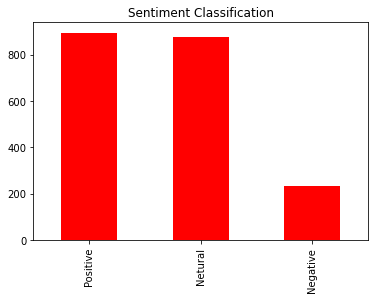

In [390]:
# let's see how many ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

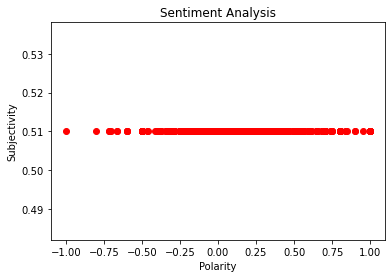

In [391]:
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [379]:
## We can see in the graph most of the tweets is on the right side (positive tweets) and very few on left side (negative tweets).

In [380]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = df.Sentiment.value_counts()

In [381]:
Df_sentiment

,Sentiment,Total
Positive,44.722361,894
Netural,43.721861,874
Negative,11.555778,231


In [382]:
## Here we see that most of the tweets of Elon Musk is Positive and Nuetral.